In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

## Forward and Backward Non-bridge Processes
The forward process:
$$ dX_t = f(t, X_t)dt + \sigma(t, X_t) dW_t $$
has a corresponding backward process:
$$ dZ_t = \{-f(T-t, Z_t) + \Sigma(T-t, Z_t)\nabla_{Z_t}\log p(T-t, Z_t|0, X_0) + \nabla_{Z_t}\cdot \Sigma(T-t, Z_t)\}dt + \sigma(T-t, Z_t)dB_t $$
We start with the easiest 1D Brownian motion:
Forward:
$$ dX_t = dW_t$$
which means: $f(t, X_t) = 0, \sigma(t, X_t) = 1$, therefore,
Reverse:
$$ dZ_t = \nabla_{Z_t}\log p(T-t, Z_t|0, X_0) dt + dB_t $$
And we know the transition density of Brownian motion in advance:
$$ p(t, x_t|0, X_0) = \frac{1}{\sqrt{2\pi t}}\exp(-(x_t-x_0)^2 / 2t) $$
which means:
$$ \nabla_{Z_t}\log p(T-t, Z_t|0, X_0) = -\frac{1}{\sqrt{2\pi (T-t)}}\frac{Z_t - X_0}{T-t} $$ 

In [17]:
key = jax.random.PRNGKey(0)
x0 = jnp.array([0.0])

def forward_f(x, t):
    return 0

def forward_g(x, t):
    return 1

def reverse_f(z, T_m_t):
    return 1 / jnp.sqrt(2.0*jnp.pi*T_m_t) * (x0 - z) / T_m_t

def reverse_g(z, T_m_t):
    return 1

def euler_maruyama(f, g, initial_condition, T=1.0, n_steps=1000, reverse=False):
    global key
    dt = T / n_steps
    ts = jnp.linspace(dt, T, n_steps, endpoint=False)
    if reverse:
        ts = ts[::-1]
    x = initial_condition
    xs = []
    for t in ts:
        key, _ = jax.random.split(key)
        x = x + f(x, t) * dt + g(x, t) * jnp.sqrt(dt) * jax.random.normal(key, shape=x.shape)
        xs.append(x)
    if reverse:
        xs[-1] = x0
    return ts, jnp.array(xs)

In [18]:
ts, path = euler_maruyama(forward_f, forward_g, x0, T=1.0, n_steps=1000)
reverse_ts, reverse_path = euler_maruyama(reverse_f, reverse_g, path[-1], T=1.0, n_steps=1000, reverse=True)

In [19]:
path.shape

(1000, 1)

Text(0, 0.5, 'x')

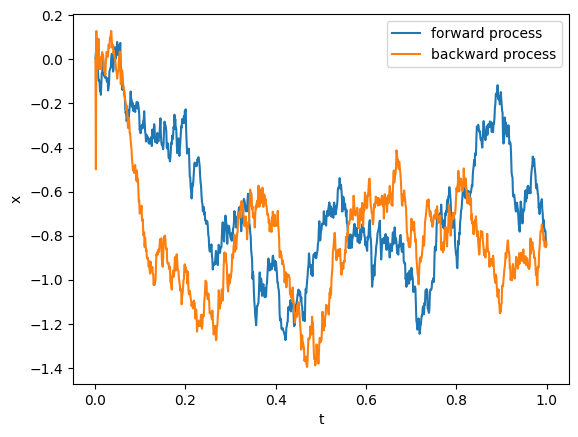

In [12]:
plt.plot(ts, path, label="forward process")
plt.plot(reverse_ts, reverse_path, label="backward process")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")

### 2 Dimensional case


In [32]:
x0 = jnp.array([0.0, 0.0])
ts, path = euler_maruyama(forward_f, forward_g, x0, T=1.0, n_steps=1000)
reverse_ts, reverse_path = euler_maruyama(reverse_f, reverse_g, path[-1], T=1.0, n_steps=1000, reverse=True)

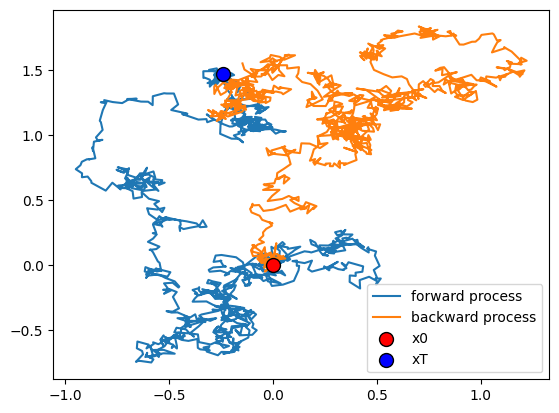

In [35]:
plt.plot(path[:, 0], path[:, 1], label="forward process", zorder=1)
plt.plot(reverse_path[:, 0], reverse_path[:, 1], label="backward process", zorder=1)
plt.scatter(x0[0], x0[1], label="x0", marker="o", s=100, color='red', edgecolors='black', zorder=2)
plt.scatter(path[-1, 0], path[-1, 1], label="xT", s=100, color='blue', edgecolors='black', zorder=2)
plt.legend()

Add constant covariance to the forward process:
$$dX_t = \sigma\cdot dW_t$$
